### **Financial** **Analytics**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### ELT PROCESS

In [ ]:
df = pd.read_csv('Financial Analytics data1.csv')
print(df.head())
print(df.info())

   S.No.            Name  Mar Cap - Crore Sales Qtr - Crore
0      1  Reliance Inds.        583436.72             99810
1      2             TCS        563709.84             30904
2      3       HDFC Bank        482953.59          20581.27
3      4             ITC        320985.27           9772.02
4      5         H D F C        289497.37          16840.51
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  460 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 15.4+ KB
None


In [ ]:
df = df.rename(columns={
    'S.No.': 'Rank',
    'Name': 'Company',
    'Mar Cap - Crore': 'Market_Cap',
    'Sales Qtr - Crore': 'Quarterly_Sales'
})

df = df.dropna()

In [ ]:
df['Market_Cap'] = pd.to_numeric(df['Market_Cap'].replace('[\,]', '', regex=True), errors='coerce')
df['Quarterly_Sales'] = pd.to_numeric(df['Quarterly_Sales'].replace('[\,]', '', regex=True), errors='coerce')

### MAIN KPIs

In [ ]:
total_market_cap = df['Market_Cap'].sum()
average_market_cap = df['Market_Cap'].mean()
median_market_cap = df['Market_Cap'].median()
total_quarterly_sales = df['Quarterly_Sales'].sum()
average_quarterly_sales = df['Quarterly_Sales'].mean()

print(f"Total Market Capitalization: {total_market_cap:.2f} Crore")
print(f"Average Market Capitalization: {average_market_cap:.2f} Crore")
print(f"Median Market Capitalization: {median_market_cap:.2f} Crore")
print(f"Total Quarterly Sales: {total_quarterly_sales:.2f} Crore")
print(f"Average Quarterly Sales: {average_quarterly_sales:.2f} Crore")

correlation = df['Market_Cap'].corr(df['Quarterly_Sales'])
print(f"Correlation between Market Cap and Quarterly Sales: {correlation:.2f}")


Total Market Capitalization: 13255374.73 Crore
Average Market Capitalization: 28816.03 Crore
Median Market Capitalization: 10432.27 Crore
Total Quarterly Sales: 1747775.34 Crore
Average Quarterly Sales: 3807.79 Crore
Correlation between Market Cap and Quarterly Sales: 0.62


### Exploratory Data Analysis (EDA) with Visualizations

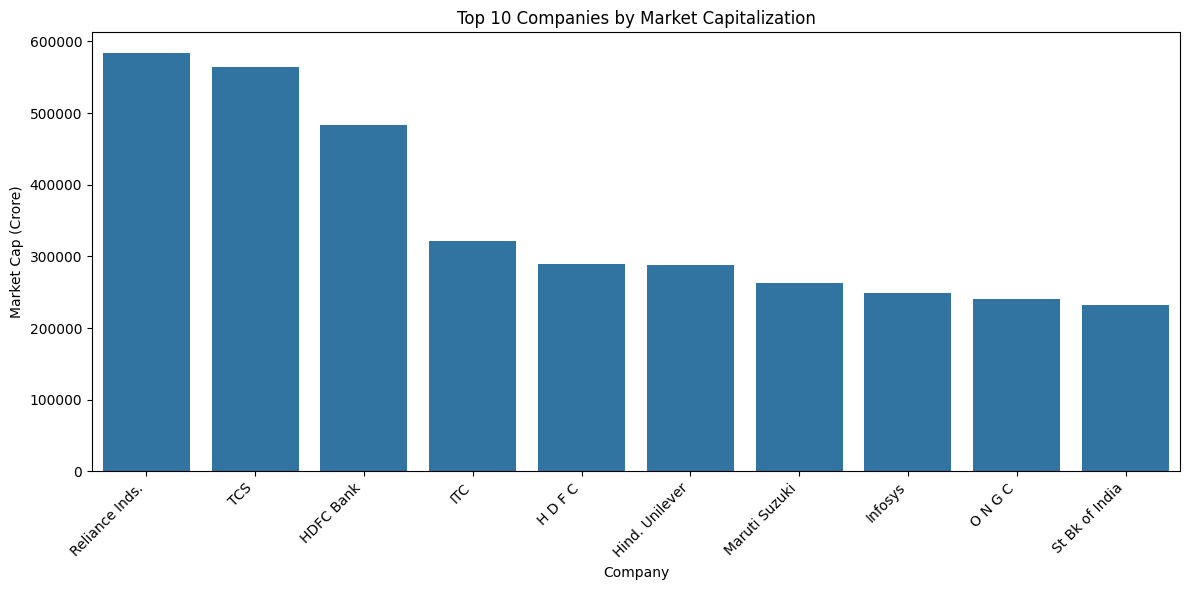

In [ ]:
# 1. Top 10 companies by Market Capitalization
plt.figure(figsize=(12, 6))
top_10_market_cap = df.nlargest(10, 'Market_Cap')
sns.barplot(x='Company', y='Market_Cap', data=top_10_market_cap)
plt.title('Top 10 Companies by Market Capitalization')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Market Cap (Crore)')
plt.tight_layout()
plt.show()

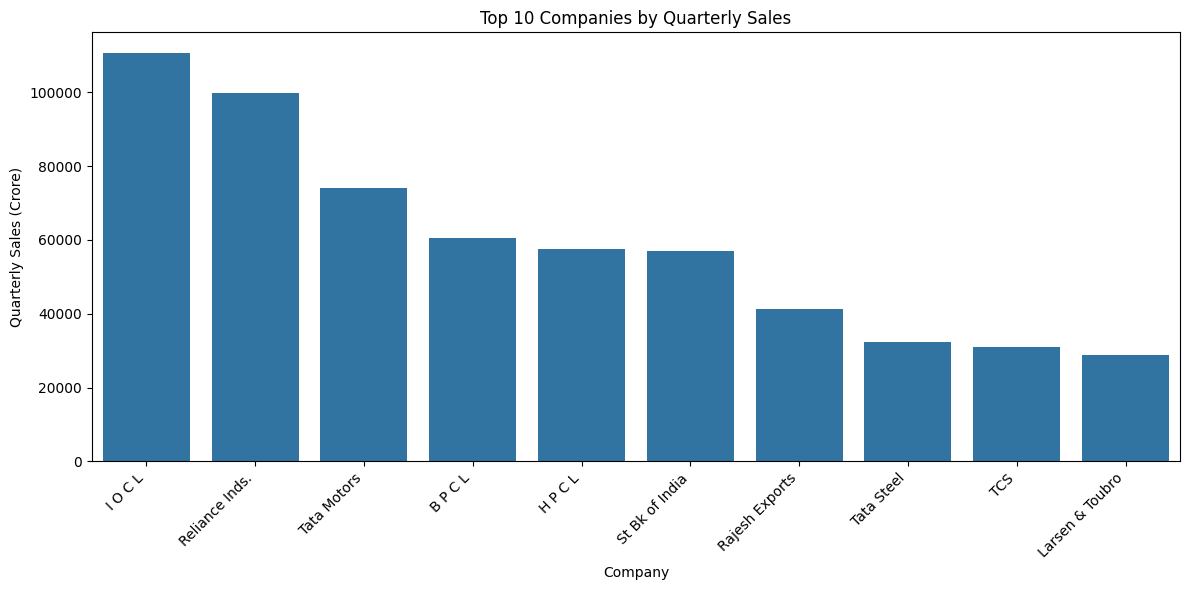

In [ ]:
# 2. Top 10 companies by Quarterly Sales
plt.figure(figsize=(12, 6))
top_10_sales = df.nlargest(10, 'Quarterly_Sales')
sns.barplot(x='Company', y='Quarterly_Sales', data=top_10_sales)
plt.title('Top 10 Companies by Quarterly Sales')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Quarterly Sales (Crore)')
plt.tight_layout()
plt.show()

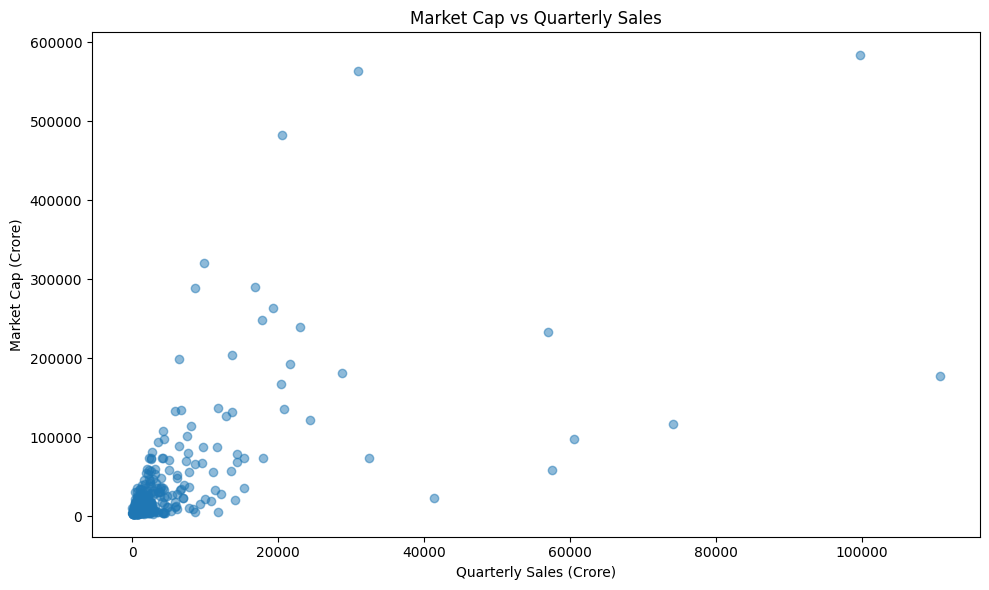

In [ ]:
# 3. Scatter plot of Market Cap vs Quarterly Sales
plt.figure(figsize=(10, 6))
plt.scatter(df['Quarterly_Sales'], df['Market_Cap'], alpha=0.5)
plt.title('Market Cap vs Quarterly Sales')
plt.xlabel('Quarterly Sales (Crore)')
plt.ylabel('Market Cap (Crore)')
plt.tight_layout()
plt.show()

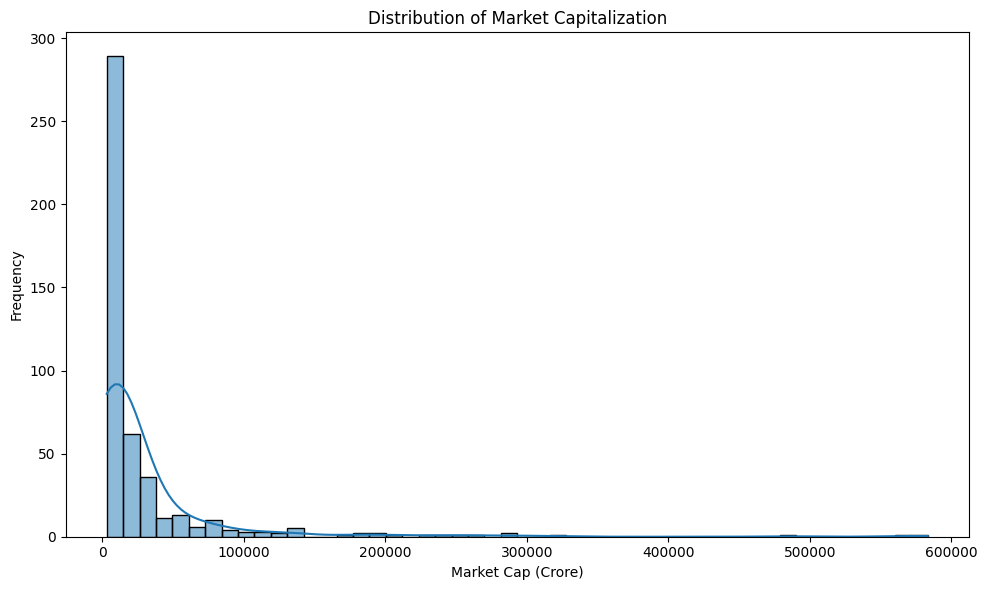

In [ ]:
# 4. Distribution of Market Capitalization
plt.figure(figsize=(10, 6))
sns.histplot(df['Market_Cap'], bins=50, kde=True)
plt.title('Distribution of Market Capitalization')
plt.xlabel('Market Cap (Crore)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

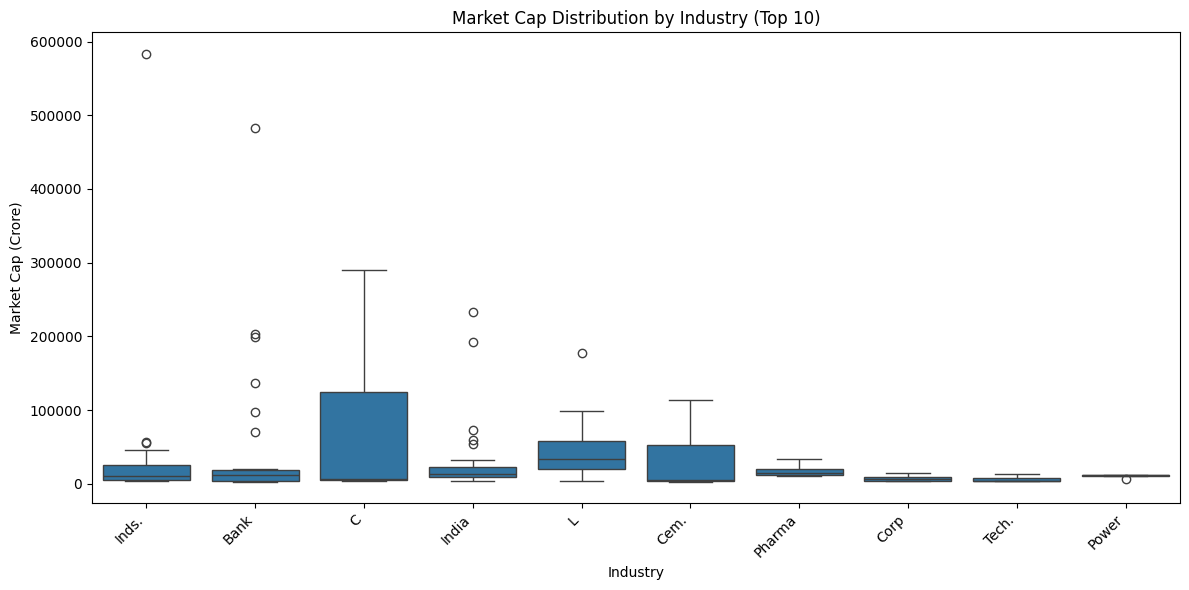

In [ ]:
 #5. Box plot of Market Cap by Industry (Top 10 industries)
df['Industry'] = df['Company'].apply(lambda x: x.split()[-1])
top_10_industries = df['Industry'].value_counts().nlargest(10).index
df_top_industries = df[df['Industry'].isin(top_10_industries)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='Market_Cap', data=df_top_industries)
plt.title('Market Cap Distribution by Industry (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Market Cap (Crore)')
plt.tight_layout()
plt.show()